Adaugarea bibliotecilor:




In [ ]:
!pip install pandas_datareader==0.10.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Colectarea datelor:

In [ ]:
df = web.DataReader('MSFT', data_source='yahoo', start='2012-05-02', end='2022-05-02')

df = df[['Close']]

Afisarea datelor:

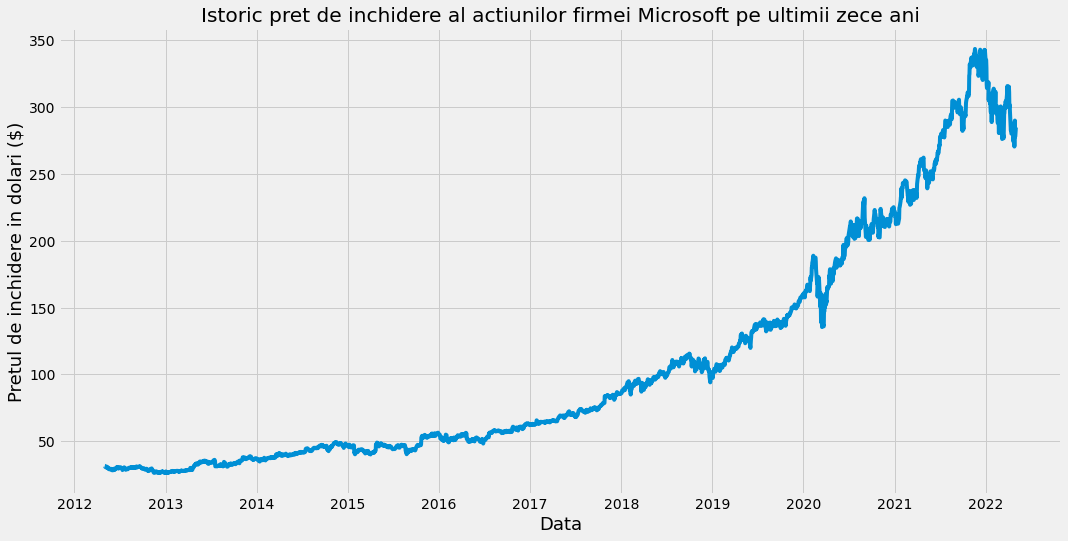

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Istoric pret de inchidere al actiunilor firmei Microsoft pe ultimii zece ani')
plt.plot(df)
plt.xlabel('Data', fontsize=18)
plt.ylabel('Pretul de inchidere in dolari ($)', fontsize=18)
plt.show()

Prelucrarea datelor:

In [ ]:
lungime_date_antrenare = math.ceil (len(df) * .9)

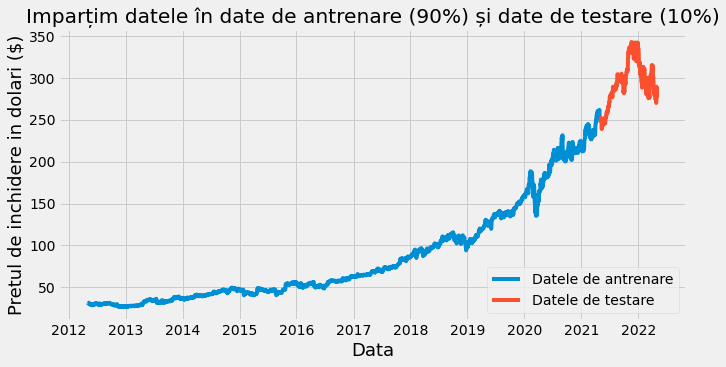

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Imparțim datele în date de antrenare (90%) și date de testare (10%)')
plt.plot(df[0:lungime_date_antrenare]['Close'])
plt.plot(df[lungime_date_antrenare:]['Close'])
plt.xlabel('Data', fontsize=18)
plt.ylabel('Pretul de inchidere in dolari ($)', fontsize=18)
plt.legend(['Datele de antrenare', 'Datele de testare'], loc='lower right')
plt.show()

In [ ]:
numar_predictii = math.ceil (len(df) * .1)

df['Predictii'] = df[['Close']].shift(-numar_predictii)

In [ ]:
X = np.array(df.drop(['Predictii'], 1))[:-numar_predictii]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
Y = np.array(df['Predictii'])[:-numar_predictii]

In [ ]:
x_antrenare, x_test, y_antrenare, y_test = train_test_split(X, Y, test_size = 0.1)

Crearea regresiei liniare

In [ ]:
regresie = LinearRegression().fit(x_antrenare, y_antrenare)

Pregatirea datelor pentru predictii

In [ ]:
x_viitor = df.drop(['Predictii'], 1)[:-numar_predictii]
x_viitor = x_viitor.tail(numar_predictii)
x_viitor = np.array(x_viitor)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


Efectuarea predictiilor:

In [ ]:
predictii = regresie.predict(x_viitor)

In [ ]:
antrenare = df[:lungime_date_antrenare]
lungime_date_antrenare1 = math.ceil (len(df) * .9)
validare = df[lungime_date_antrenare-1:]
validare['Predictii'] = predictii

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Afisarea predictiilor:

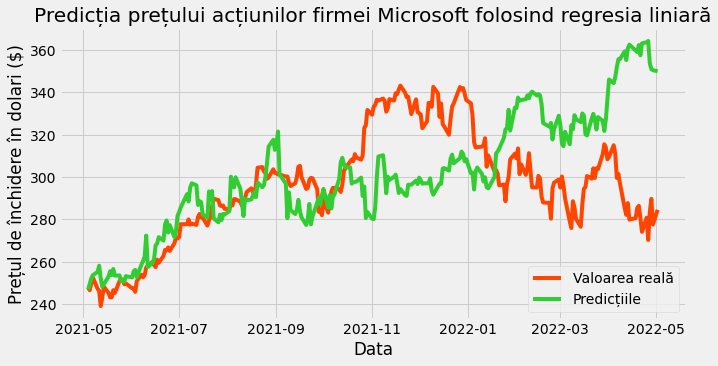

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Predicția prețului acțiunilor firmei Microsoft folosind regresia liniară')
plt.xlabel('Data')
plt.ylabel('Prețul de închidere în dolari ($)')
plt.plot(validare['Close'], color='orangered')
plt.plot(validare['Predictii'], color='limegreen')
plt.legend(['Valoarea reală', 'Predicțiile'], loc='lower right')
plt.show()

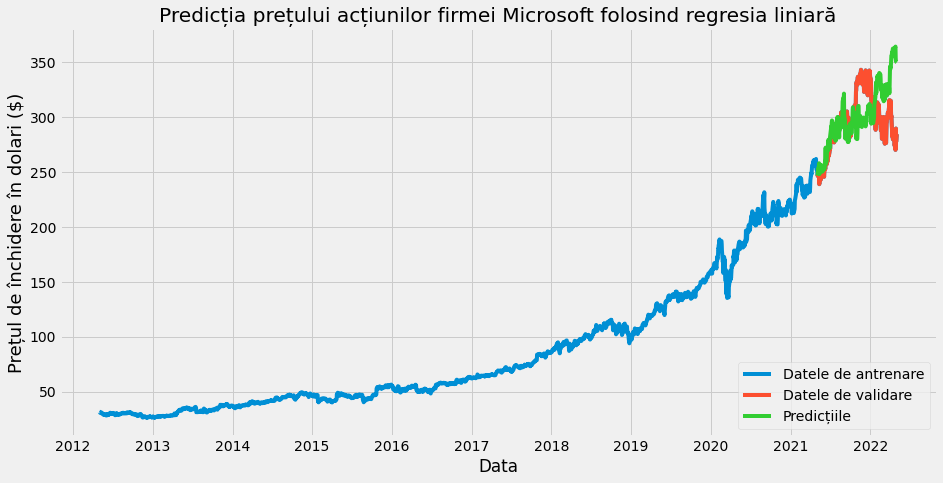

In [ ]:
plt.figure(figsize=(14,7))
plt.title('Predicția prețului acțiunilor firmei Microsoft folosind regresia liniară')
plt.xlabel('Data')
plt.ylabel('Prețul de închidere în dolari ($)', fontsize=18)
plt.plot(df['Close'])
plt.plot(validare['Close'])
plt.plot(validare['Predictii'], color='limegreen')
plt.legend(['Datele de antrenare', 'Datele de validare', 'Predicțiile'], loc='lower right')
plt.show()

Calculare MAPE

In [ ]:
mape = np.mean(np.abs(validare['Predictii'] - validare['Close'])/np.abs(validare['Close']))
print('Eroare procentuala media absoluta (MAPE) =', mape) 

Eroare procentuala media absoluta (MAPE) = 0.07564331650556588
